In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [11]:
import warnings
warnings.filterwarnings(action='ignore')

#### Dataset
* https://www.kaggle.com/abbasit/kyphosis-dataset

In [3]:
#loading the data
data = pd.read_csv('data/kyphosis.csv')

In [5]:
data.head() #kyphosis condition is the target column which shows if the condition is[Present] or [absent] after the surgery

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
data.shape

(81, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


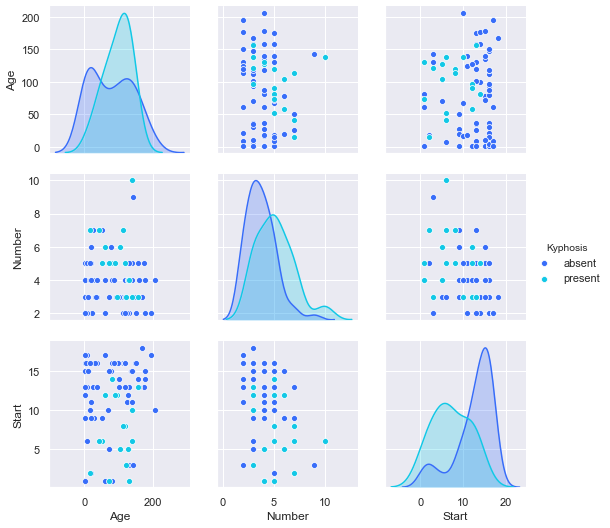

In [12]:
sns.pairplot(data,hue='Kyphosis');

### Train Test Split

In [14]:
featured_x = data.drop('Kyphosis',axis=1)
target_y = data['Kyphosis']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test= train_test_split(featured_x,target_y,test_size=0.2,random_state=123)

### Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf_tree = DecisionTreeClassifier()

In [19]:
#fit
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
#Score
clf_tree.score(x_test,y_test)

0.6470588235294118

#### Checking the confusion matrix and classification report 

In [22]:
y_preds = clf_tree.predict(x_test)

In [23]:
#confusion matrix 
from sklearn.metrics import confusion_matrix,classification_report

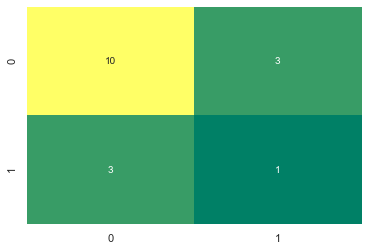

In [24]:
sns.heatmap(confusion_matrix(y_test,y_preds),cbar=False,cmap='summer',annot=True);

In [25]:
#classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      absent       0.77      0.77      0.77        13
     present       0.25      0.25      0.25         4

    accuracy                           0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17



### Comparing with RandomForestCLassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier()

In [29]:
#fit
clf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
#score
clf.score(x_test,y_test)

0.7058823529411765

In [31]:
y2_preds = clf.predict(x_test)

<AxesSubplot:>

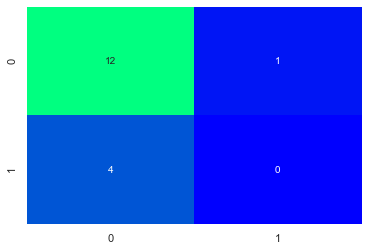

In [33]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y2_preds),cbar=False,annot=True,cmap='winter')

In [34]:
print(classification_report(y_test,y2_preds))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [35]:
#old classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      absent       0.77      0.77      0.77        13
     present       0.25      0.25      0.25         4

    accuracy                           0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17

